In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## ignoring unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading the data
data_url = "https://drive.google.com/file/d/1xEM4cjfUHftVelPE-nInrY8Tbzr9yG-r/view?usp=sharing"
inital_url = "https://drive.google.com/uc?id="

data_url = inital_url + data_url.split('/')[-2]
df = pd.read_csv(data_url)

**Feature information:**
1. age - age of the patient (int)
2. sex - sex patient identifies (str)
3. on_thyroxine - whether patient is on thyroxine (bool)
4. query on thyroxine - *whether patient is on thyroxine (bool)
5. on antithyroid meds - whether patient is on antithyroid meds (bool)
6. sick - whether patient is sick (bool)
7. pregnant - whether patient is pregnant (bool)
8. thyroid_surgery - whether patient has undergone thyroid surgery (bool)
9. I131_treatment - whether patient is undergoing I131 treatment (bool)
10. query_hypothyroid - whether patient believes they have hypothyroid (bool)
11. query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
12. lithium - whether patient * lithium (bool)
13. goitre - whether patient has goitre (bool)
14. tumor - whether patient has tumor (bool)
15. hypopituitary - whether patient * hyperpituitary gland (float)
16. psych - whether patient * psych (bool)
17. TSH_measured - whether TSH was measured in the blood (bool)
17. TSH - TSH level in blood from lab work (float)
18. T3_measured - whether T3 was measured in the blood (bool)
19. T3 - T3 level in blood from lab work (float)
20. TT4_measured - whether TT4 was measured in the blood (bool)
21. TT4 - TT4 level in blood from lab work (float)
22. T4U_measured - whether T4U was measured in the blood (bool)
23. T4U - T4U level in blood from lab work (float)
24. FTI_measured - whether FTI was measured in the blood (bool)
25. FTI - FTI level in blood from lab work (float)
26. TBG_measured - whether TBG was measured in the blood (bool)
27. TBG - TBG level in blood from lab work (float)
28. referral_source - (str)
29. target - hyperthyroidism medical diagnosis (str)
30. patient_id - unique id of the patient (str)

**Target metadata**
    The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments.

    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


**The feature named patient_id is not usefull for the model training. So, it needs to be removed.**

In [5]:
df.drop(axis=1, columns=['patient_id'],inplace=True)

In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29,F,f,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,-
2,41,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,-
3,36,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,-
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [7]:
## checking the number of columns
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target'],
      dtype='object')

In [8]:
## checking the basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [9]:
df.describe().loc[['min','max'],:].to_json("schema_in.json")

In [10]:
## finding the names of numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Categorical columns: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'target']


In [11]:
## finding the unique values and their number for each categorical feature
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}\n")

sex:
Number of unique values: 2
Unique values: ['F' 'M' nan]

on_thyroxine:
Number of unique values: 2
Unique values: ['f' 't']

query_on_thyroxine:
Number of unique values: 2
Unique values: ['f' 't']

on_antithyroid_meds:
Number of unique values: 2
Unique values: ['f' 't']

sick:
Number of unique values: 2
Unique values: ['f' 't']

pregnant:
Number of unique values: 2
Unique values: ['f' 't']

thyroid_surgery:
Number of unique values: 2
Unique values: ['f' 't']

I131_treatment:
Number of unique values: 2
Unique values: ['f' 't']

query_hypothyroid:
Number of unique values: 2
Unique values: ['t' 'f']

query_hyperthyroid:
Number of unique values: 2
Unique values: ['f' 't']

lithium:
Number of unique values: 2
Unique values: ['f' 't']

goitre:
Number of unique values: 2
Unique values: ['f' 't']

tumor:
Number of unique values: 2
Unique values: ['f' 't']

hypopituitary:
Number of unique values: 2
Unique values: ['f' 't']

psych:
Number of unique values: 2
Unique values: ['f' 't']

TSH_mea

**Most of the categorical features have only 2 unique values namely f (false) and t (true)**

In [12]:
## checking the range of numerical columns
df.describe().T[['min','max']]

,min,max
age,1.000,65526.00
TSH,0.005,530.00
T3,0.050,18.00
TT4,2.000,600.00
T4U,0.170,2.33
FTI,1.400,881.00
TBG,0.100,200.00


In [13]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


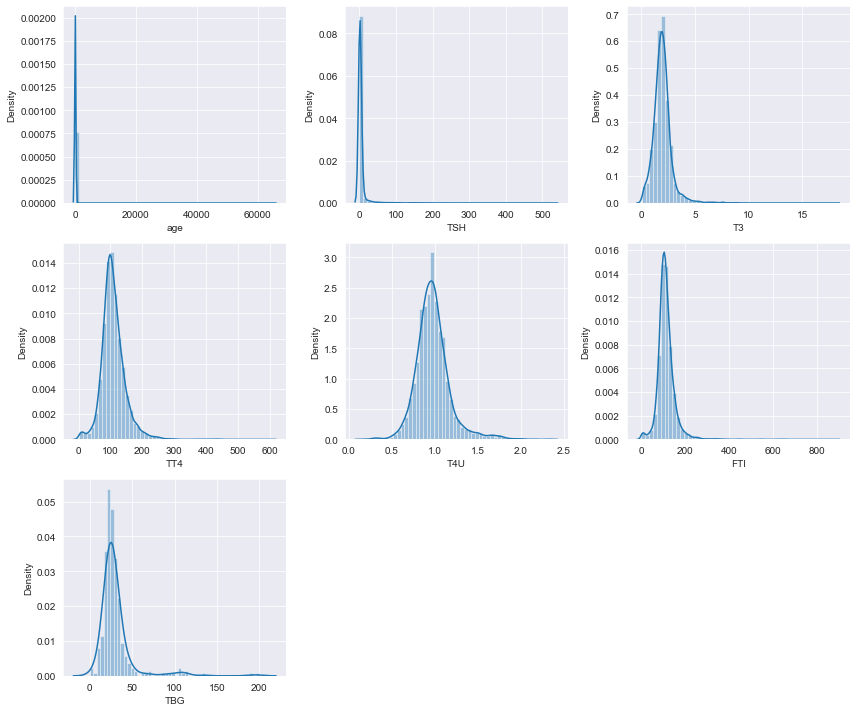

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

**It seems age feature has some serious issue of outliers. We can ignore the outliers in other features since they could be the indicators of the disease**

In [15]:
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    75,    56,    85,
          71,    67,    55,    61,    46,    44,    82,    64,    70,
          33,    59,    53,    52,    49,    35,    48,    27,    69,
          76,    73,    68,    66,    30,    88,    38,    58,    21,
          45,    83,    62,    25,    86,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526], dtype=int64)

In [16]:
print("Ages greater than 100:")
for age in df['age'].unique():    
    if age > 100:
        print(age)

Ages greater than 100:
455
65511
65512
65526


**We will replace the ages greater than 100 with NaN value and then fill them with the mean of remaining values**

In [17]:
df['age'] = np.where(df['age'] > 100, np.nan, df['age'])

In [18]:
df['age'].unique()

array([29., 41., 36., 32., 60., 77., 28., 54., 42., 51., 37., 16., 43.,
       63., 40., 75., 56., 85., 71., 67., 55., 61., 46., 44., 82., 64.,
       70., 33., 59., 53., 52., 49., 35., 48., 27., 69., 76., 73., 68.,
       66., 30., 88., 38., 58., 21., 45., 83., 62., 25., 86., 72., 14.,
       15., 39., 26., 20., 80., 90., 23., 18., 13., 78., 24., 81., 92.,
       57., 74.,  9., 47., 17., 11., 50., 34.,  8., 79., 31., 65., 84.,
       12., 10., 19., 22.,  1.,  2., 97.,  6., 89., 87., nan, 93.,  7.,
       91.,  5., 94.,  4., 95.,  3.])

**It seems now all the age values are within 100**

In [19]:
## checking if the data is unbalanced or not
df['target'].value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [20]:
## checking the presense of null values in the data
df.isnull().sum()

age                       4
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
dtype: int64

**The features with naming of the format name_measured has two unique values t and f, t if the measurement is done and f if the measurement is not done**
**The features namely TSH, T3, TT4, T4U, FTI, TBG have null value whenever their corresponding measured columns has value f**
**So here the approach will to remove the name_measured columns and filling the null values in the columns TSH, T3, TT4, T4U, FTI, TBG with mean of the values in that column**

In [21]:
## removing unnecessary columns
df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=1,inplace=True)

In [22]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'referral_source', 'target'],
      dtype='object')

In [23]:
df.isnull().sum()

age                       4
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
referral_source           0
target                    0
dtype: int64

In [24]:
for feature in ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']:
    cat_cols.remove(feature)

In [25]:
cat_cols

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source',
 'target']

In [26]:
cat_cols.remove('target')

In [27]:
cat_cols

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source']

In [28]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [29]:
df['target'] = np.where(df['target'] == '-', 'Other', df['target'])

In [30]:
# label_dict = dict(zip(df['target'].unique(),range(len(df['target'].unique()))))
# label_dict

In [31]:
# df['target'] = df['target'].map(label_dict)

In [32]:
## Imports
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [33]:
## 1. creating a pipeline to fill the null values and scale the values in categorical columns

cat_pipe = Pipeline([
    
    ('cat_imputer1', SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)),
    ('cat_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)),
    ('cat_imputer2', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

## 2. Creating numerical pipeline

num_pipe = Pipeline([
    
    # ('num_imputer',KNNImputer(n_neighbors=3, weights="uniform"))
    ('num_imputer',SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True))

])

In [34]:
## 3. Creating a combined pipeline

preprocess_pipe = ColumnTransformer([
    ('num_pipeline',num_pipe,num_cols),
    ('cat_pipeline',cat_pipe,cat_cols)
], remainder='passthrough')

In [35]:
## Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [36]:
## 4. Creating pipelines for different machine learning algorithms

log_reg = LogisticRegression(random_state=123,max_iter=2000)

knn = KNeighborsClassifier()

random_forest = RandomForestClassifier(random_state=456, max_depth=3)

xgboost = XGBClassifier(max_depth=2)

In [37]:
## 5. Creating a full pipeline consists of preprocessing as well as model training

logistic_regression_pipeline = Pipeline([
    ('log_preprocess',preprocess_pipe),
    ('log_model',log_reg)
])

knn_algo_pipeline = Pipeline([
    ('knn_preprocess',preprocess_pipe),
    ('knn_model',knn)
])

random_forest_classifier_pipeline = Pipeline([
    ('random_forest_preprocess',preprocess_pipe),
    ('random_forest_model',random_forest)
])

xgboost_pipe = Pipeline([
    ('xgboost_preprocess',preprocess_pipe),
    ('xgboost_model',xgboost)
])

In [38]:
## 6. splitting the data into independent and dependent features
X = df.drop(columns=['target'],axis=1)
y = df['target']

In [39]:
## 7.splitting the data into train and test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=195)

In [40]:
## 8. Checking the cross validation score for each of the above algorithms
pipelines = [logistic_regression_pipeline, knn_algo_pipeline, random_forest_classifier_pipeline, xgboost_pipe]
classifiers = ['logistic regression classifer', 'KNeighbors classifier', 'Random forest classifier', 'xgboost classifier']

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)

for i in range(len(pipelines)):
    cv_score = cross_val_score(pipelines[i],train_X,train_y,scoring='accuracy', cv=skf)
    print(f"The cross validation score for the {classifiers[i]} based on accuracy score is {np.round(cv_score.mean(),3)} +/= {np.round(cv_score.std(),3)}")

The cross validation score for the logistic regression classifer based on accuracy score is 0.863 +/= 0.01
The cross validation score for the KNeighbors classifier based on accuracy score is 0.799 +/= 0.009
The cross validation score for the Random forest classifier based on accuracy score is 0.751 +/= 0.003
[00:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_r